In [ ]:
!pip install qiskit
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0dcc9effa2076c8aae1168332519d3beeb602ac0de4a49ec6bd994813a44d462
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


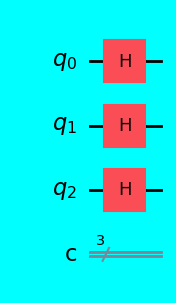

In [ ]:
from qiskit import QuantumCircuit
from matplotlib import pyplot as plt


ckt= QuantumCircuit(3,3)# 3 qubits and 3 classical bits quantum wires.
for i in range(3):
  ckt.h(i) #hadamard gate for h #

des={'backgroundcolor': 'cyan'}
ckt.draw(output ='mpl', style=des) #mpl draws the circuit graphically rather than just a text based representation

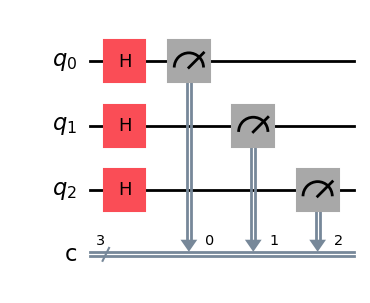

In [ ]:
#for state evolution and what the circuit eveolves to and for to be probabilistic, we need computational meausres; to find an accurate probabilstic distribution of states.
#this can be done by number of shots , the number of times circuit is run. MORE SHOTS, MORE ACCURACY.
#measurement operators and measure function.
#QuantumCircuits have a measure method that takes the qubit to measure and the classical bit to store the result in.
# Alternatively if we want to measure all qubits, we can use the measure_all method.

ckt.measure([0,1,2], [0,1,2])
des={'backgroundcolor': 'white'}
ckt.draw(output='mpl', style=des)

In [ ]:
#qiskit (more specifically qiskit-ibm-runtime) provides us with FakeProvider which allows us to mimic and simulate the behavior of real devices through the snapshots they provide.
#since accessing real quantum computers is difficult.
!pip install qiskit-ibm-runtime
from qiskit_ibm_runtime.fake_provider import FakeKyoto

backend = FakeKyoto()

frequency = 2048
job= backend.run(ckt, shots=frequency)
result=job.result()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 12.5 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.55.2-py3-none-any.whl size=339687 sha256=84cb220c6c577eff301cba8d4fb4830be1ed813d42625f421cfdf14c79dbb89c
  Stored in directory: /root/.cache/pip/wheels/af/ef/67/6c17a948d54c37e26b0c927dc206d95a258e9a3f7ba7014c67
  Created wheel for ibm-cloud-sdk-core: f

/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:374: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [ ]:
#We really just want the probabilities of the basis states
counts = result.get_counts()
probabilities = {state: count / frequency for state, count in counts.items()} #state is the measurement result (e.g., '00', '01', '10', '11').
#count is the number of times the result is observed and the frequency is the number of shots or the number of times the quantum circuit is run.
probabilities

{'001': 0.126953125,
 '101': 0.12158203125,
 '111': 0.13037109375,
 '000': 0.115234375,
 '110': 0.1279296875,
 '100': 0.1240234375,
 '011': 0.12451171875,
 '010': 0.12939453125}

In [ ]:
counts = result.get_counts()
print('Measurement counts:', counts)
print('Probabilities:', probabilities)

Measurement counts: {'001': 260, '101': 249, '111': 267, '000': 236, '110': 262, '100': 254, '011': 255, '010': 265}
Probabilities: {'001': 0.126953125, '101': 0.12158203125, '111': 0.13037109375, '000': 0.115234375, '110': 0.1279296875, '100': 0.1240234375, '011': 0.12451171875, '010': 0.12939453125}


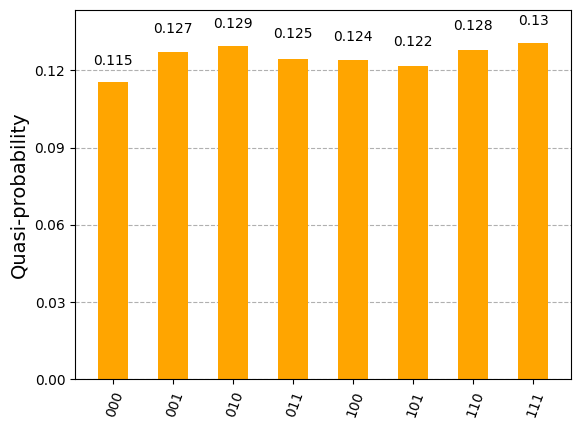

In [ ]:

from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
plot_histogram(probabilities, color= 'orange')

#ax=fig.gca()
#ax.set_yscale('log')
#ax.set_ylim(0.001, 0.3)

#plt.xlabel('State')
#plt.ylabel('Probability')
#plt.show(probabilities)

#these probabilities are not perfect because of the errors like temp, small shots, noise, improper gates, etc.

In [ ]:
!pip install qiskit-aer

In [ ]:
#for ideal/perfect states , we have aer simulators that perform by cancelling the noise, and tweaking for realistic simulations.

from qiskit_aer import AerSimulator
ckt= QuantumCircuit(3,3)
for i in range(3):
  ckt.h(i)
ckt.save_statevector() #saves the statevector(description of the quantum state )

aer_backend = AerSimulator(method ='statevector') #simulates the quantum circuit in the backend and method allows the extraction of the particular quantum state
job=aer_backend.run(ckt)#execution
result=job.result()#results procurred
statevector = result.get_statevector() #The final statevector of the circuit is extracted from the results.
#This statevector represents the state of the quantum system after the application of the gates.
statevector


Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


In [ ]:
statevector.draw('latex')
#the above part can be done by the sampler and estimator primitive. The Estimator primitive is used to estimate the expectation value of an observable
# https://docs.quantum.ibm.com/guides/get-started-with-primitives

<IPython.core.display.Latex object>

In [ ]:
#transpiling
#circuits have gets that need to be decomposed into series of operations , qubits might not be connected with each other , some qubits might not be available for some gates
# some circuits contain componenets that are redundant. Circuits need transpiler to convert them from abstract into physical state on the device.

backend.operation_names # (Basis) Operations available on the FakeKyoto backend

['rz',
 'switch_case',
 'reset',
 'x',
 'id',
 'measure',
 'ecr',
 'for_loop',
 'if_else',
 'sx',
 'delay']

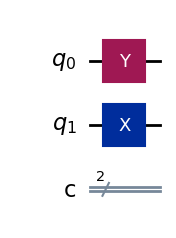

In [ ]:
test_ckt=QuantumCircuit(2,2)
test_ckt.y(0)#represnt the gates we need
test_ckt.x(1)
test_ckt.draw('mpl')

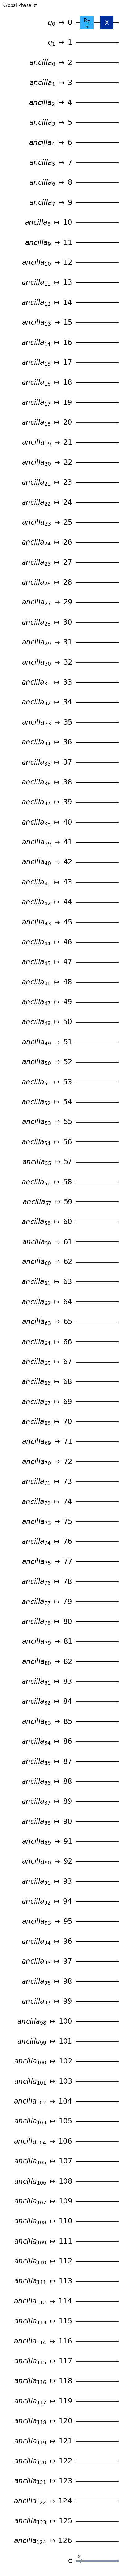

In [ ]:
from qiskit import transpile
transpiled_ckt=transpile(test_ckt, backend)
transpiled_ckt.draw('mpl')

**PREPARING AN ENTANGLED STATE**!

In [ ]:
# The target state is |1> + |1>.Solve the gate and you would get it.
#we can use the statevector simulator to simulate the circuit and then calculate the fiedility of the statevector using/comparing with the target simulator
import numpy as np
from qiskit.quantum_info import Statevector
target_state=np.array([1,0,0,1])/np.sqrt(2) #normalisation.

target_statevector= Statevector(target_state)# creates a Statevector object from the defined target_state
target_statevector.draw('latex')

<IPython.core.display.Latex object>

Deciding the Coefficients
The coefficients in the state vector [1, 0, 0, 1] correspond to the amplitudes of these basis states:

1 (first component) for
∣
00
⟩
∣00⟩
0 (second component) for
∣
01
⟩
∣01⟩
0 (third component) for
∣
10
⟩
∣10⟩
1 (fourth component) for
∣
11
⟩
∣11⟩


These coefficients determine the quantum state's composition in terms of these basis states. The specific values [1, 0, 0, 1] represent a quantum state that is a superposition of the
∣
00
⟩
∣00⟩ and
∣
11
⟩
∣11⟩ states with equal amplitude and no phase difference. The 0 values indicate that the state has no component in the
∣
01
⟩
∣01⟩ and
∣
10
⟩
∣10⟩ basis states.

creating a parameterized quantum circuit, defining an objective function, and optimizing the parameters of the circuit to match a target quantum state.

In [ ]:
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import state_fidelity
from scipy.optimize import minimize #for optimising the statevector function
from qiskit_aer import StatevectorSimulator

param_a = Parameter('a')
param_b = Parameter('b')

qc = QuantumCircuit(2)
qc.ry(Parameter('a'), 0)
qc.rx(Parameter('b'), 0)
qc.cx(0, 1) #cnot gate entangles the qubits 0 and 1

def objective_function(params):
    aer_backend = StatevectorSimulator() #computes statevector
    bound_circuit = qc.assign_parameters({'a': params[0], 'b': params[1]}) #assign_parameters: Binds the parameters param_a and param_b to specific values.
    job = aer_backend.run(bound_circuit)
    result = job.result()
    statevector = result.get_statevector()
    fidelity = state_fidelity(target_statevector, statevector)
    return 1 - fidelity #fiedility ranges from 0 to 1 and this function minimizes the problem.

initial_guess = [0,  0] # Try changing and varying the initial guess to see what other values the optimizer converges to
result = minimize(objective_function, initial_guess, method='BFGS', tol=1e-8) # Try changing the optimization method and tolerance to see how the optimizer behaves

minimize: A function from the SciPy library used to minimize the objective_function.
method='BFGS': The optimization algorithm used, BFGS (Broyden-Fletcher-Goldfarb-Shanno), is a quasi-Newton method.
tol=1e-8: This is the tolerance parameter, which determines the stopping criterion for the optimization process. It specifies the precision of the result, meaning the optimizer will stop iterating when the change in the function value or the parameters is smaller than this threshold.


In [ ]:
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.220446049250313e-16
        x: [ 1.571e+00  0.000e+00]
      nit: 6
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.941e+00  0.000e+00]
            [ 0.000e+00  1.000e+00]]
     nfev: 27
     njev: 9

tolerance is a parameter that specifies the acceptable error range for convergence. A smaller tolerance value means the optimizer will aim for a more precise result, potentially requiring more iterations and computational time. Conversely, a larger tolerance allows the optimization to stop earlier, which may result in a less accurate solution but faster computation.
This means the optimizer will consider the optimization process converged if the change in the objective function's value or the change in the parameter values between iterations is less than 10^-8.



In [ ]:
# The optimized parameters are stored in the x attribute of the result object, see what the state is
optimized_params = result.x
optimized_circuit = qc.assign_parameters({'a': optimized_params[0], 'b': optimized_params[1]})
aer_backend = StatevectorSimulator()
job = aer_backend.run(optimized_circuit)
result = job.result()
optimized_statevector = result.get_statevector()
optimized_statevector.draw('latex')

<IPython.core.display.Latex object>

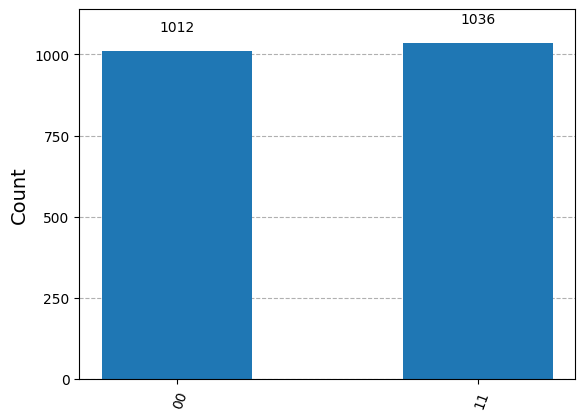

In [ ]:
plot_histogram(optimized_statevector.sample_counts(shots = 2048))

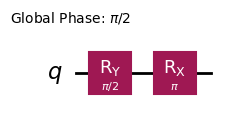

In [ ]:
hadamard_ckt=QuantumCircuit(1) #applies hadamard gate to the circuit on one qubit
hadamard_ckt.h(0) #0th qubit
transpile(hadamard_ckt, basis_gates=['ry', 'rx']).draw('mpl')

ERRORS AND THEIR MITIGATION.
